# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
score


c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5406824747857603

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
score

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
score

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [6]:
#%pip install yellowbrick

In [7]:
from yellowbrick.cluster import KElbowVisualizer

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

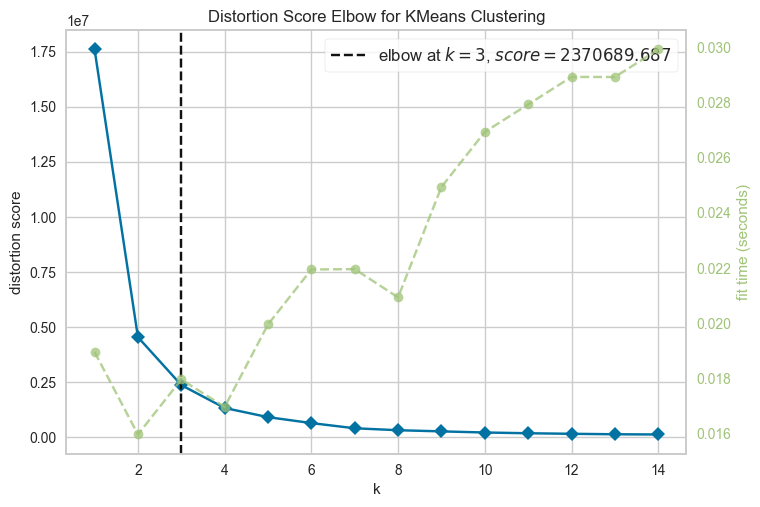

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
modelo = KMeans().fit(X)
visual = KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)
visual.poof()

In [9]:
'''
El número de clusters óptimo es 3, ya que es el valor que maximiza el coeficiente de silueta.
'''

'\nEl número de clusters óptimo es 3, ya que es el valor que maximiza el coeficiente de silueta.\n'

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [10]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(X)

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarnin

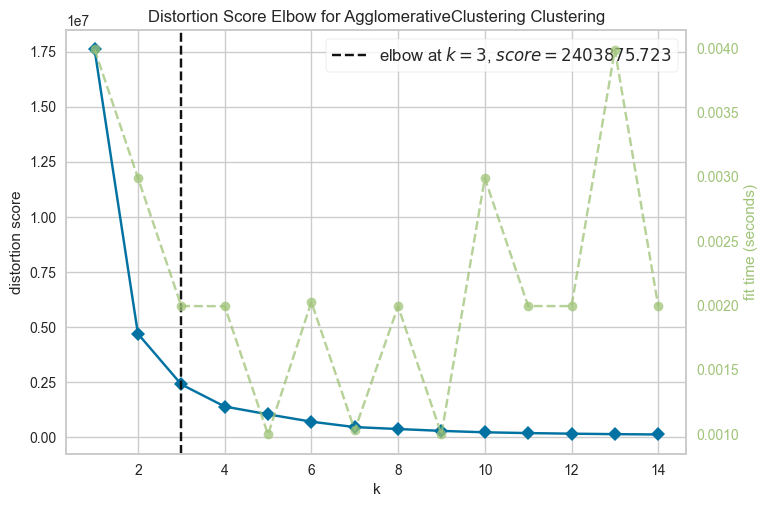

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
visual = KElbowVisualizer(agg, k=(1, 15))
visual.fit(X)
visual.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [27]:
#%pip install plotly
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


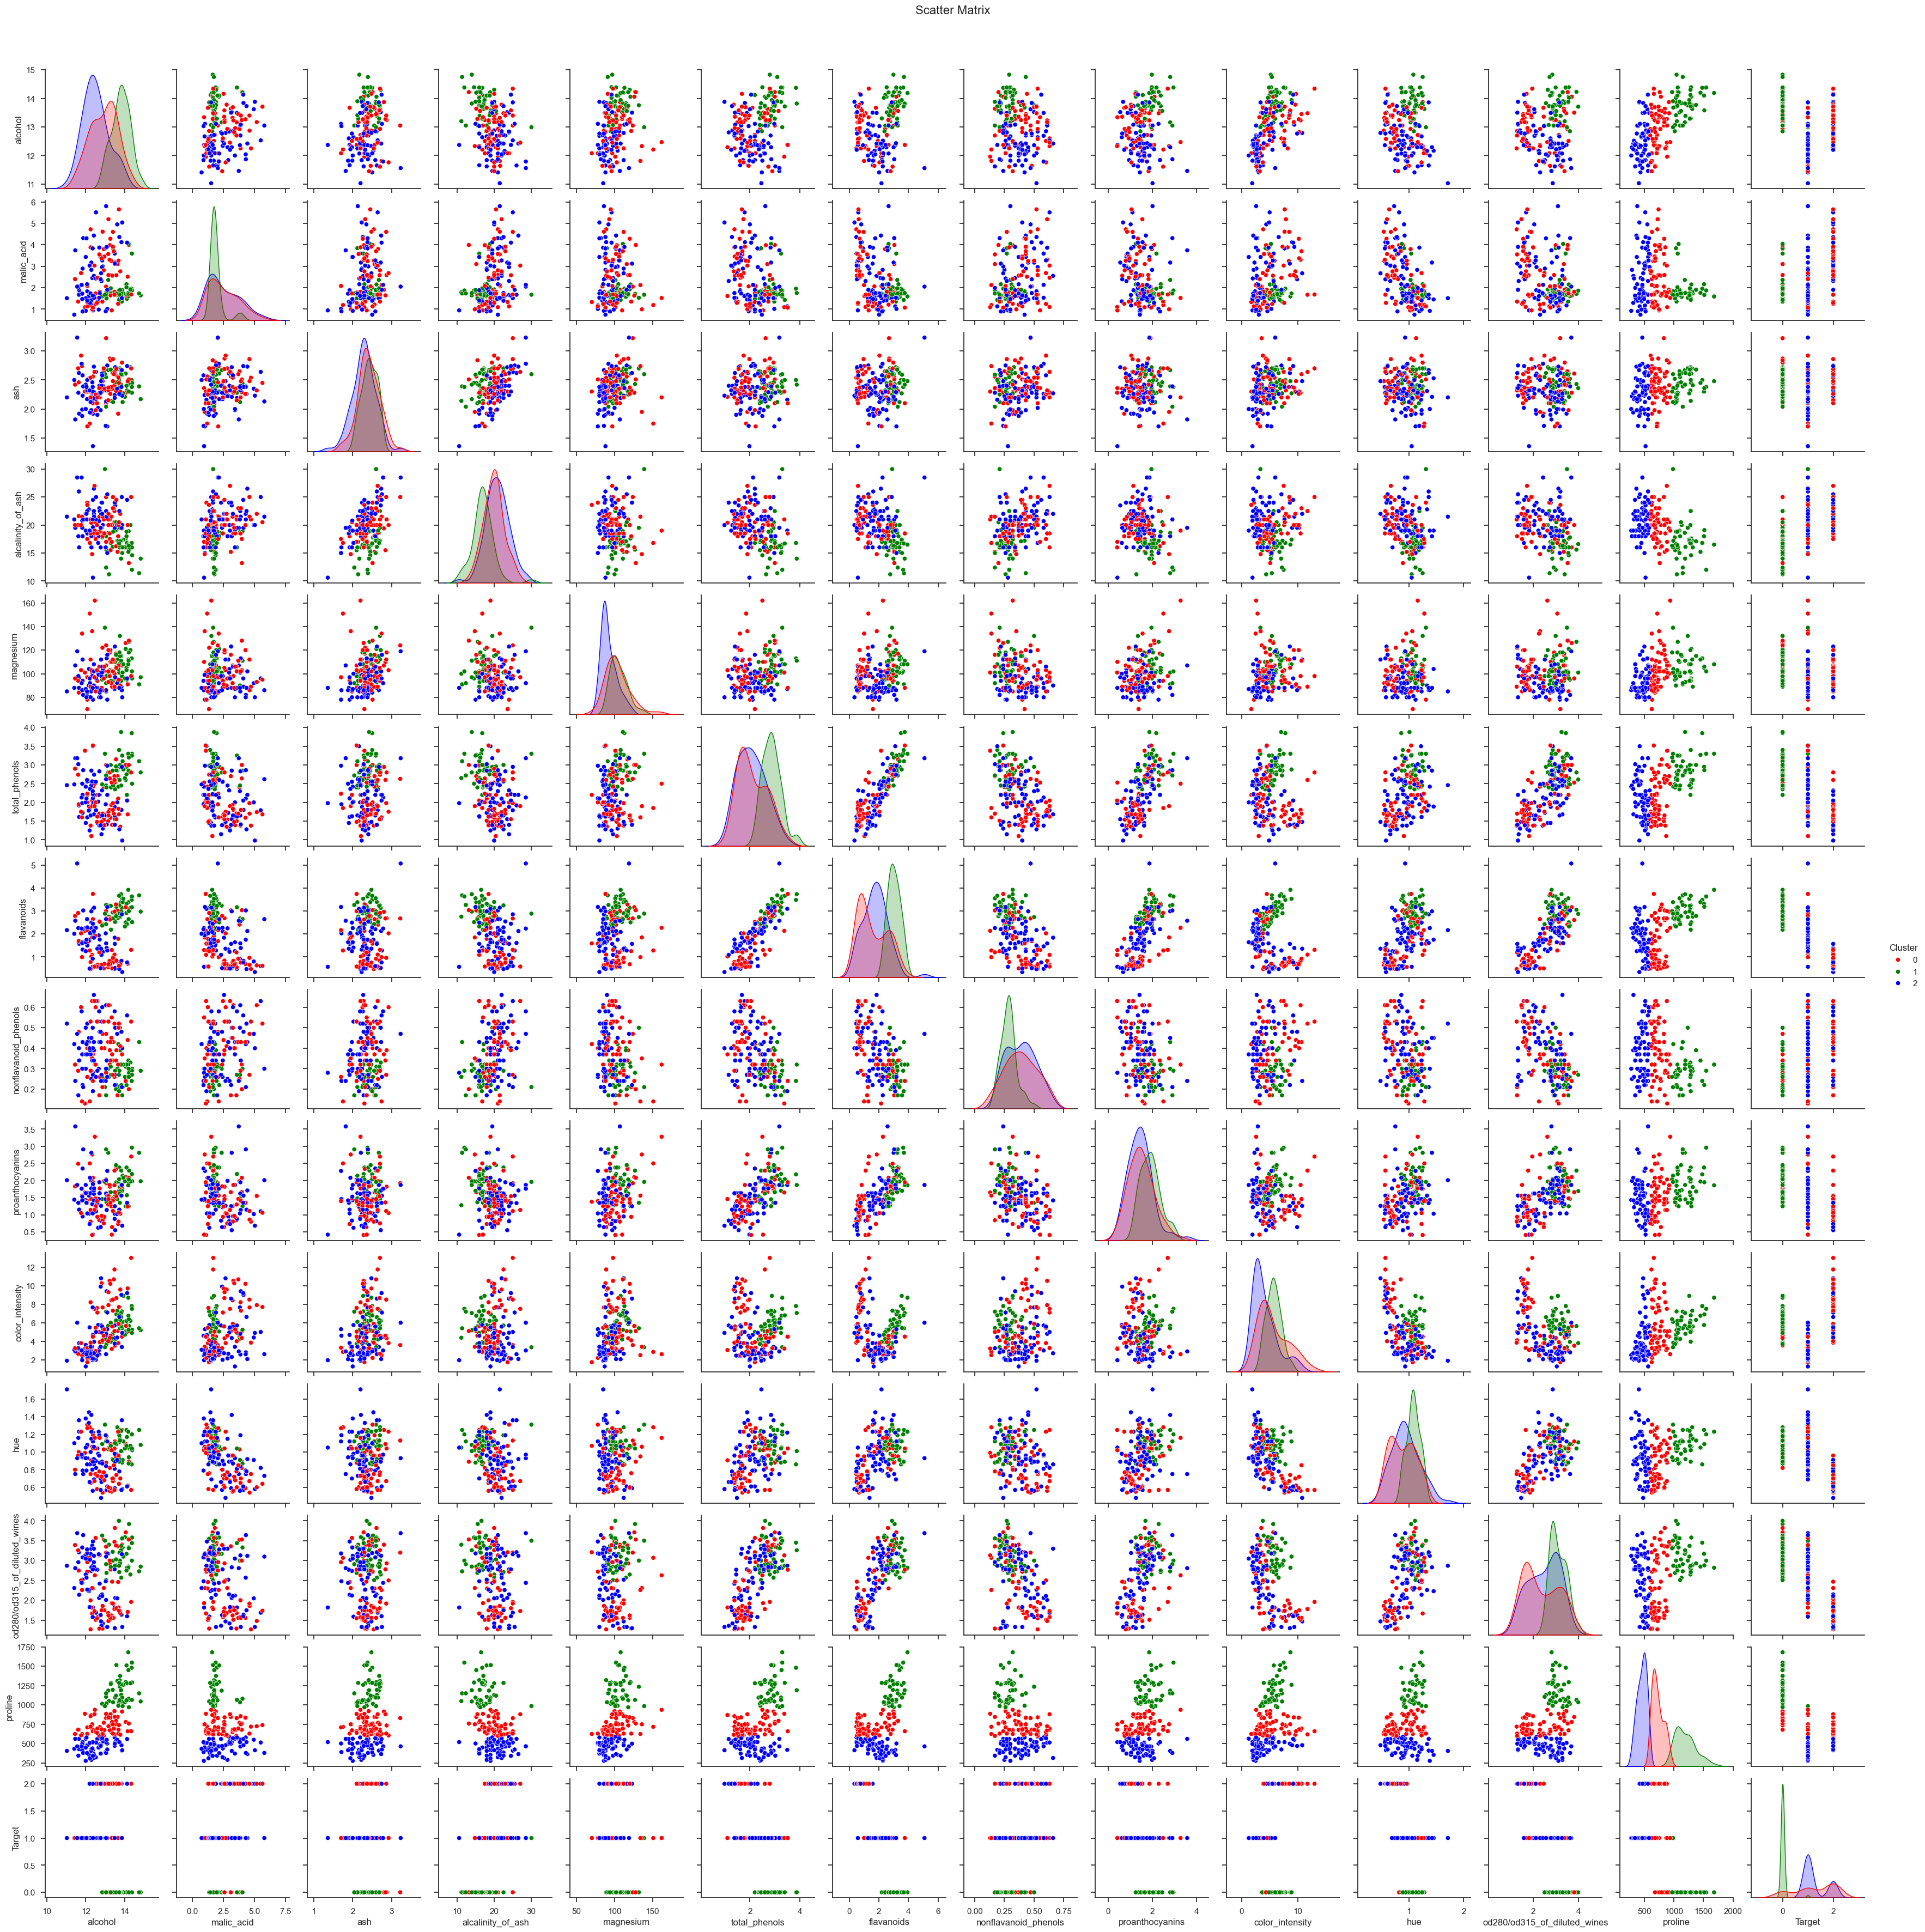

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data.data)

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Cluster'] = clusters
df['Target'] = data.target

sns.set(style="ticks")
scatter_matrix = sns.pairplot(df, hue='Cluster', palette={0: 'red', 1: 'green', 2: 'blue'})

plt.suptitle('Scatter Matrix', y=1.02, size=16)
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [18]:
from sklearn.decomposition import PCA

c:\Users\Álvaro\.conda\envs\clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


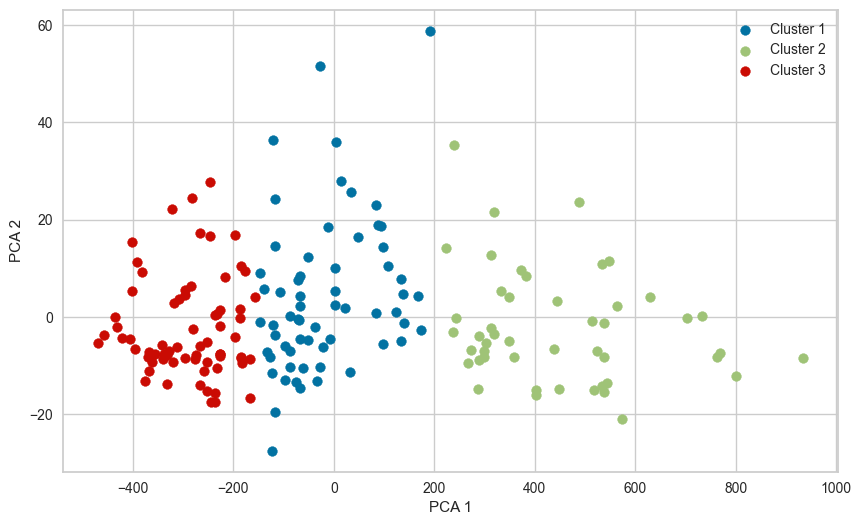

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data.data)

plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], label=f'Cluster {cluster + 1}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [21]:
from sklearn.manifold import TSNE
X,y = datasets.load_iris(return_X_y=True)

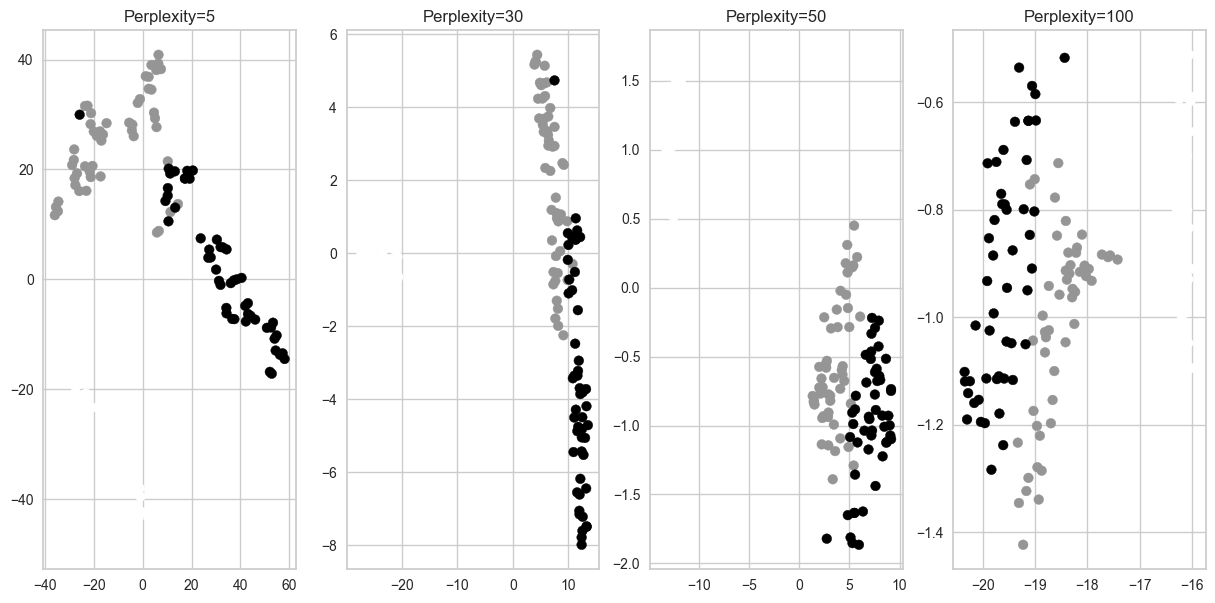

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();